In [2]:
import pandas as pd

In [10]:
df = pd.read_csv('strava_data.csv', parse_dates=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   Unnamed: 0                     176 non-null    int64              
 1   resource_state                 176 non-null    int64              
 2   name                           176 non-null    object             
 3   distance                       176 non-null    float64            
 4   moving_time                    176 non-null    int64              
 5   elapsed_time                   176 non-null    int64              
 6   total_elevation_gain           176 non-null    float64            
 7   type                           176 non-null    object             
 8   sport_type                     176 non-null    object             
 9   workout_type                   107 non-null    float64            
 10  id                        

In [13]:
df.start_date = pd.to_datetime(df.start_date)

<AxesSubplot:xlabel='start_date'>

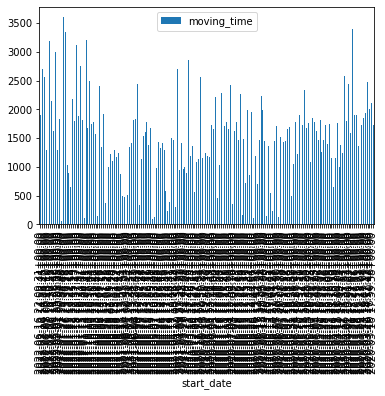

In [16]:
df.plot(x='start_date', y='moving_time', kind='bar')

In [35]:
pd.options.display.float_format = "{:,.2f}".format

In [36]:
df[['average_heartrate', 'max_heartrate', 'average_speed', 'max_speed']].describe()

,average_heartrate,max_heartrate,average_speed,max_speed
count,170.00,170.00,176.00,176.00
mean,160.35,181.52,2.38,4.68
std,23.35,16.52,0.85,2.14
min,71.60,93.00,0.00,0.00
25%,153.93,178.00,2.04,4.10
50%,169.45,185.00,2.71,4.60
75%,175.20,190.00,2.85,5.95
max,191.80,204.00,3.90,11.17


In [23]:
# df.start_date.min()
df.start_date.max()

Timestamp('2022-06-16 22:09:31+0000', tz='UTC')

In [27]:
df['rank'] = df.start_date.rank()-1

<AxesSubplot:xlabel='rank'>

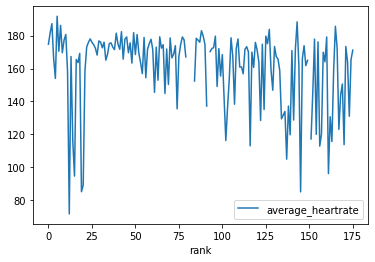

In [30]:
df.plot(x='rank', y='average_heartrate')

In [31]:
df.average_heartrate.diff()

0       NaN
1      -5.7
2     -34.5
3      32.9
4       9.5
       ... 
171   -37.8
172    12.1
173    21.2
174    -5.6
175    -6.9
Name: average_heartrate, Length: 176, dtype: float64

In [34]:
df.average_heartrate.diff()[1]

-5.699999999999989

In [37]:
import datetime

date = datetime.date.today()

In [38]:
date

datetime.date(2022, 7, 23)

In [40]:
year, week_num, day_of_week = date.isocalendar()
print("Week #" + str(week_num) + " of year " + str(year))

Week #29 of year 2022


In [44]:
df['week'] = df.start_date.dt.isocalendar().week
df['year'] = df.start_date.dt.isocalendar().year

In [53]:
this_week = df[df['week'] == week_num]

In [54]:
this_week.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 95 to 97
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   Unnamed: 0                     3 non-null      int64              
 1   resource_state                 3 non-null      int64              
 2   name                           3 non-null      object             
 3   distance                       3 non-null      float64            
 4   moving_time                    3 non-null      int64              
 5   elapsed_time                   3 non-null      int64              
 6   total_elevation_gain           3 non-null      float64            
 7   type                           3 non-null      object             
 8   sport_type                     3 non-null      object             
 9   workout_type                   2 non-null      float64            
 10  id                          

In [56]:
this_week.distance

95   6,196.00
96   6,511.40
97   4,988.30
Name: distance, dtype: float64

In [58]:
df.distance

0     4,977.80
1     6,533.90
2         0.00
3     4,647.10
4     3,220.70
        ...   
171   4,845.70
172   8,089.60
173   6,472.50
174   6,523.50
175   4,856.90
Name: distance, Length: 176, dtype: float64

In [61]:
df.iloc[0].distance/1609

3.09372280919826